In [71]:
import nltk
import string
from collections import Counter

In [72]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [73]:
with open('Someone Like You.txt', 'r') as f: #the input is a file
    text = f.read()

In [74]:
lower_case = text.lower()
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

In [75]:
tokenized_words = word_tokenize(cleaned_text, "english")

In [76]:
final_words = []
for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

In [77]:
lemma_words = []
for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

In [98]:
emotion_list = []
with open('outputEmotions.csv', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace("'", '').strip()
        word, emotion = clear_line.split(',')

        if word in lemma_words:
            emotion_list.append(emotion)

print(emotion_list)
w = Counter(emotion_list) #counting positive and negative words' numbers
print(w) #display them

['positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative']
Counter({'negative': 12, 'positive': 7})


In [111]:
final_text = ', '.join([str(word) for word in lemma_words])

In [112]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mayl7\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [113]:
def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    print(score)
    if score['neg'] > score['pos']:
        print("Negative Sentiment")
    elif score['neg'] < score['pos']:
        print("Positive Sentiment")
    else:
        print("Neutral Sentiment")

In [114]:
sentiment_analyse(final_text) #calculating the scores of the final processed text

{'neg': 0.316, 'neu': 0.482, 'pos': 0.202, 'compound': -0.9648}
Negative Sentiment


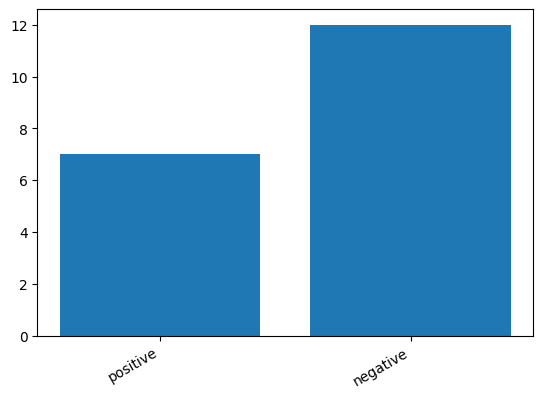

In [115]:
fig, ax1 = plt.subplots() #using counter generated to create a bar chart
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()